<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1">Data preparation</a></span><ul class="toc-item"><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-1.1"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-1.2"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3"><font color="green"><b>Conclusion</b></font></a></span></li></ul></li><li><span><a href="#Problem-research" data-toc-modified-id="Problem-research-2">Problem research</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><font color="green"><b>Conclusion</b></font></a></span></li></ul></li><li><span><a href="#Avoiding-Disbalance" data-toc-modified-id="Avoiding-Disbalance-3">Avoiding Disbalance</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1">Upsampling</a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-3.2"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3">Downsampling</a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-3.4"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Model-improvement" data-toc-modified-id="Model-improvement-3.5">Model improvement</a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-3.6"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.7">Conclusion</a></span></li></ul></li><li><span><a href="#Test-Model" data-toc-modified-id="Test-Model-4">Test Model</a></span><ul class="toc-item"><li><span><a href="#Total" data-toc-modified-id="Total-4.1"><font color="green"><b>Total<b></b></b></font></a></span></li></ul></li></ul></div>

# Customer churn

Customers began to leave X-Bank. Every month. A little, but noticeable. Banking marketers figured keeping current customers was cheaper than attracting new ones.

It is necessary to predict whether the client will leave the bank soon or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. Check the *F1*-measure on the test set yourself. To pass the project successfully, you must bring the metric to 0.59.

Additionally, measure *AUC-ROC*and compare its value with *F1*-measure.

Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data preparation

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("magma")
from itertools import product
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9200,9201,15567923,Barese,739,France,Female,30,6.0,0.00,1,0,0,122604.44,0
6008,6009,15700937,Romano,767,Spain,Female,24,5.0,0.00,2,1,1,67445.85,0
1480,1481,15716822,Moen,646,France,Male,30,5.0,98014.74,1,1,1,12757.14,0
1798,1799,15610446,Chinedum,714,France,Female,51,4.0,88308.87,3,0,0,5862.53,1
9410,9411,15734659,Sozonov,640,Germany,Female,46,5.0,107978.40,2,1,0,155876.06,0


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


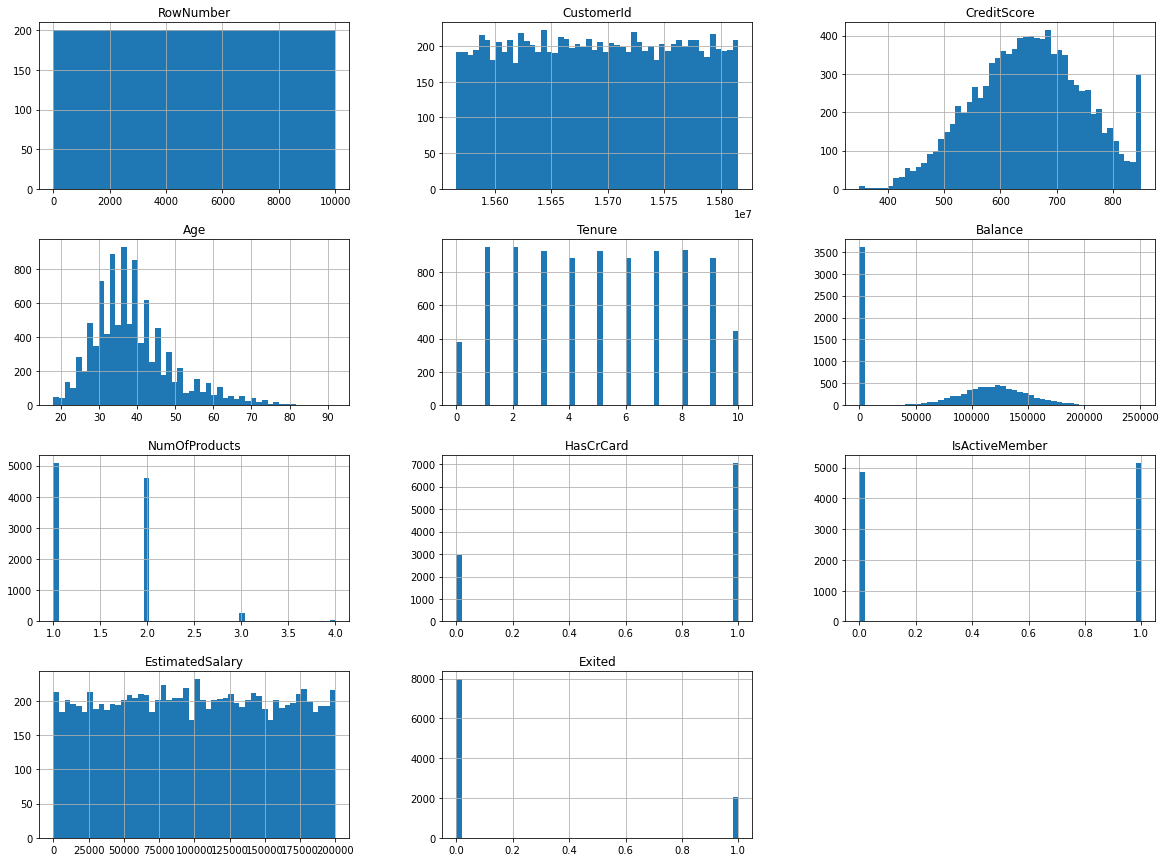

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [2]:
# Let's examine the file
data = pd.read_csv('Churn.csv')
display(data.sample(5), data.info(), data.describe())
data.hist(bins=50, figsize=(20,15), linewidth=1)
plt.show()
data.tail()

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Intermediate conclusion<b></font>


Before us is an array of data on 10,000 clients of Beta-Bank, which contains the following information:
    
<blockquote>
    
- RowNumber - row index in the data;
- CustomerId — unique customer identifier;
- Surname - surname;
- CreditScore — credit rating;
- Geography — country of residence;
- Gender - gender;
- Age — age;
- Tenure - how many years a person has been a client of the bank;
- Balance — account balance;
- NumOfProducts - the number of bank products used by the client;
- HasCrCard - the presence of a credit card;
- IsActiveMember — client activity;
- EstimatedSalary — estimated salary;
- Exited - the fact that the client left.
</blockquote>
<hr>
    
Necessary:
<blockquote>
    
- Check data for repetitions;
- Deal with gaps in the Tenure column. It contains 10% of missing information, which the model will learn better. Considering that we do not know the reason for the skip, we will replace it with a value that will not be repeated;
- Remove columns from the table that will not affect the training of the model in any way;
- Convert categorical features from numerical ones;
- Rename columns for ease of use;
- Convert the data to the required types.
</blockquote> 
</div>

In [3]:
# Fill in the gaps in the Tenure column by grouping customers by features.

data['Tenure'] = data.groupby([data['NumOfProducts'],
                              data['Geography'],
                              data['Age'],
                              data['HasCrCard']])['Tenure'].apply(lambda x: x.fillna(round(x.median(),0)))

# A few gaps are left; let's fill them in by changing the grouping by age to the client's activity.
data['Tenure'] = data.groupby([data['NumOfProducts'],
                              data['Geography'],
                              data['HasCrCard'],
                              data['IsActiveMember']])['Tenure'].apply(lambda x: x.fillna(round(x.median(),0)))

data['Tenure'].value_counts().sum()

10000

In [4]:
# Check users for repetitions
display(data.CustomerId.value_counts().sum())

'''
The number of unique ids is 10.000, as is the number of rows.
So there are no complete duplicates either.
It is necessary to remove columns that do not carry any useful information:
Line number, client id, and last name

'''
data1 = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

10000

In [5]:
# Let's translate categorical features into numerical ones
# Prepare the data using the OHE method, avoiding the dummy trap
display(data1.Geography.value_counts().to_frame(),
        data1.Gender.value_counts().to_frame()
       )

data1 = pd.get_dummies(data1, drop_first=True)

,Geography
France,5014
Germany,2509
Spain,2477


,Gender
Male,5457
Female,4543


In [6]:
# Rename the columns for ease of use
data1.columns = ['credit_score',
                 'age',
                 'tenure',
                 'balance',
                 'num_of_products',
                 'has_cr_card',
                 'is_active_member',
                 'estimated_salary',
                 'exited',
                 'is_germany',
                 'is_spain',
                 'is_male']

data1 = data1.astype({'tenure': 'Int32'})

display(data1.info(),
        data1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  Int32  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_cr_card       10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   is_germany        10000 non-null  uint8  
 10  is_spain          10000 non-null  uint8  
 11  is_male           10000 non-null  uint8  
dtypes: Int32(1), float64(2), int64(6), uint8(3)
memory usage: 703.2 KB


None

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,is_germany,is_spain,is_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Intermediate conclusion<b></font>


After the first data preparation stage, we dealt with gaps, converted all columns to numerical form, removed unnecessary columns, and checked all data types. Now we have an array of data on 10,000 clients of Beta-Bank, which contains the following information:
    
<blockquote>
    
- credit_score — credit rating;
- age - age;
- tenure — how many years a person has been a client of the bank;
- balance — account balance;
- num_of_products - the number of bank products used by the client;
- has_cr_card - the presence of a credit card;
- is_active_member — client activity;
- estimated_salary — estimated salary;
- exited — the fact that the client left;
- is_germany — country of residence Germany;
- is_spain - country of residence Spain;
- is_male - male gender.
</blockquote>
<hr>
    
Next, we need the following:
<blockquote>
    
- Scale numerical values so the algorithm does not decide that features with large values and scatter are more critical. After scaling, the mean value of the feature will be 0, and the variance will be 1;
- Divide the samples into features and the target feature, and then divide them into training, validation, and testing in the proportion of 60/20/20. The target feature in our table is the 'exited' column; according to the rest of the features, our model will predict the values of the target feature in the validation and test sets at the end of training.
</blockquote> 
</div>

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,is_germany,is_spain,is_male
0,-0.326221,0.293517,-1.075715,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.434443,0.117350,-0.911583,0,1,0.216534,0,0,1,0


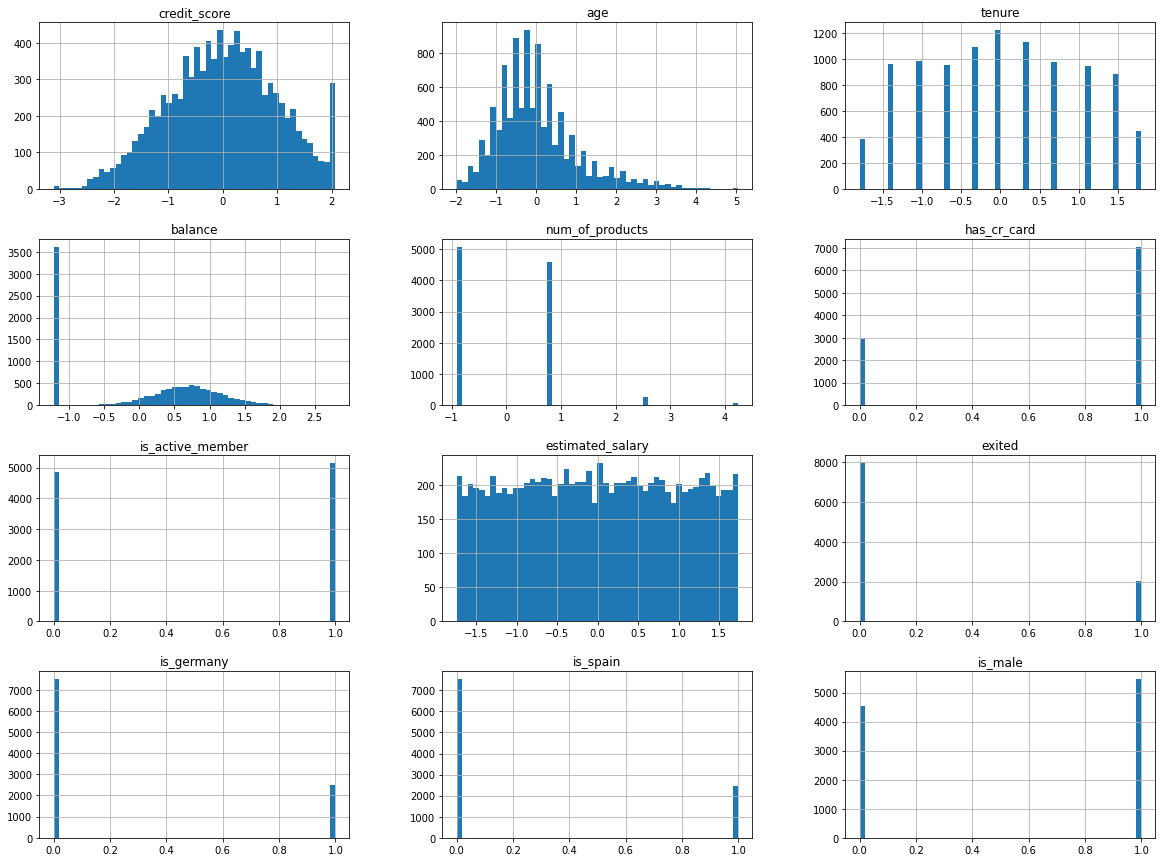

In [7]:
# Let's scale numerical values
numeric = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure', 'num_of_products']
scaler = StandardScaler()
scaler.fit(data1[numeric])
def scaling(data):
    data[numeric] = scaler.transform(data[numeric])
    display(data.head(2))
            

scaling(data1)
    

data1.hist(bins=50, figsize=(20,15), linewidth=1)
plt.show()

In [8]:
# Divide the model into samples with the following proportion 6/2/2

features = data1.drop('exited', axis=1)
target = data1['exited']

features_train, features_valid_test, target_train, target_valid_test = ( 
                                train_test_split(
                                features, target, test_size=0.40, random_state=12345)
)
features_valid, features_test, target_valid, target_test = ( 
                                train_test_split(
                                features_valid_test, target_valid_test, test_size=0.50, random_state=12345)
)
print(' Training data scale:', features_train.shape,
'\n Validation data scale:', features_valid.shape,
'\n Test data scale:', features_test.shape)
display(target_train.value_counts(normalize = 1).to_frame(),
      target_valid.value_counts(normalize = 1).to_frame(),
      target_test.value_counts(normalize = 1).to_frame())

 Training data scale: (6000, 11) 
 Validation data scale: (2000, 11) 
 Test data scale: (2000, 11)


,exited
0,0.800667
1,0.199333


,exited
0,0.791
1,0.209


,exited
0,0.7885
1,0.2115


<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Conclusion</b></font>

<center><b>We are faced with the task of classification</b></center>
    
Before studying the problem, we transformed the data:
    
<blockquote>
    
- Checked the data for repetitions;
- Dealt with passes;
- Removed unnecessary features (name, id, line number);
- Converted categorical features into numerical ones;
- Brought the data to the required types;
- Made scaling of numerical values;
- Separated the target feature from the features;
- Divided the data into samples (training, validation, and test).

</blockquote>
<hr>
    
<b>Next you need:</b>
    
Explore the problem
    
Based on a preliminary analysis of the initial data on the histogram of the 'exited' column, it can be seen that there is an imbalance of classes. The data contains four times more data on customers who have yet to leave the bank. Considering that the main task for our model is to successfully predict and predict the moment the client wants to go, such an imbalance can interfere with the quality training of the model. Also, some customers who have not left the bank may want to leave.
    
</div>

## Problem research

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

<b>Let's start building our first-class imbalance models. </b>
    
Let's write a function that will train the model. We will submit the model, training, and validation samples as input. We will train the model inside the function and make a prediction based on the validation set. Let's output:
    
- An error matrix, which will display the accuracy of our predictions;
    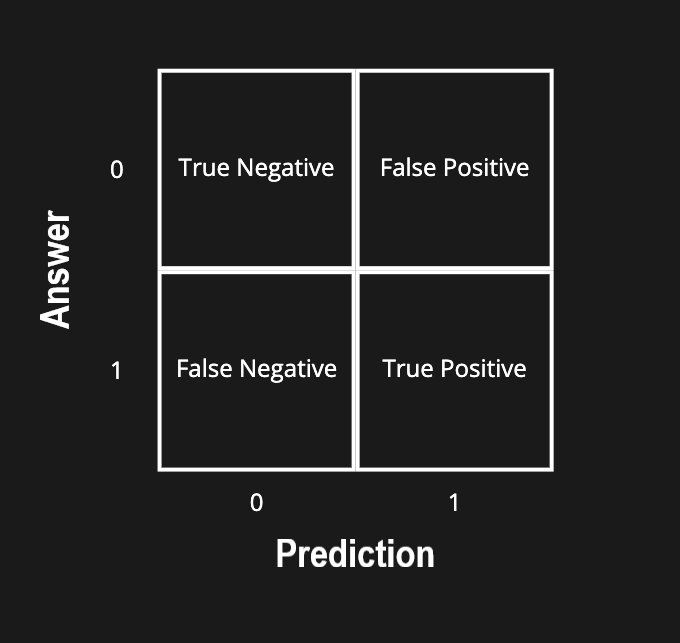
    
- Completeness (recall) - what proportion of positive responses among all the answers was allocated by the model;
- Accuracy (precision) - how many negative answers the model found while looking for positive ones;
- F1-measure - harmonic mean of completeness and accuracy;
- AUC-ROC - area under ROC curve or error curve. If the value is more significant than 0.5, then the model is better than the random model.
</div>

In [9]:
# Let's write the function of training the model, predicting and displaying metrics on the screen

def modeltrain(model_type, feature_train, targets_train, features_valid, target_valid):
    
    model = model_type
    
    # Train model
    model.fit(feature_train, targets_train)
    
    
    prediction = model.predict(features_valid)

    # Let's build the matrix of inaccuracies
    matrix = confusion_matrix(target_valid, prediction)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    # Displaying the matrix
    sns.heatmap(matrix, annot=True, annot_kws={'size':15}, linewidths=0.3)
    plt.xlabel('Predicted classes')
    plt.ylabel('True classes')
    plt.title('Matrix of errors')
    plt.show()
    
    
    # Display classification metrics
    print("Recall" , recall_score(target_valid, prediction))
    print("Precision", precision_score(target_valid, prediction))
    print("F1-score", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, prediction), '\n')

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

<center><b>Class balance</b></center>    

</div>

In [10]:
# Class balance
data1['exited'].value_counts(normalize = 1).to_frame()

,exited
0,0.7963
1,0.2037


<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Logistic regression</b></center>
</div>

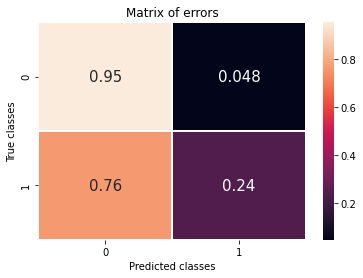

Recall 0.23684210526315788
Precision 0.5657142857142857
F1-score 0.33389544688026984
AUC-ROC 0.5944008250715284 



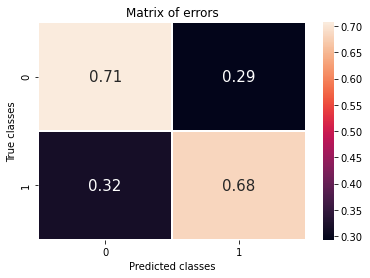

Recall 0.6842105263157895
Precision 0.3818424566088118
F1-score 0.4901456726649529
AUC-ROC 0.6957715084170604 

{'C': 1, 'class_weight': 'balanced', 'intercept_scaling': 1.0}


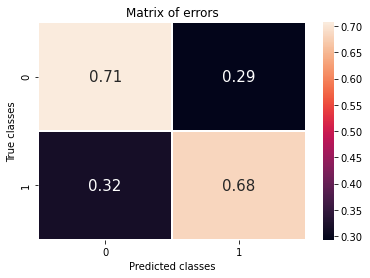

Recall 0.6842105263157895
Precision 0.3818424566088118
F1-score 0.4901456726649529
AUC-ROC 0.6957715084170604 

CPU times: user 6.86 s, sys: 7.5 s, total: 14.4 s
Wall time: 14.4 s


In [11]:
%%time
from sklearn.model_selection import GridSearchCV

# Default Model
modeltrain(LogisticRegression(random_state=12345, solver='liblinear'), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With class_weight
modeltrain(LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced'), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With hyperparameter selection
parametres = {'intercept_scaling': [0.5, 1.0, 1.5],
              'class_weight': [None, 'balanced'],
              'C': [0.5, 1, 1.5]}
model = LogisticRegression(random_state=12345, solver = 'liblinear')

grid_search = GridSearchCV(model, parametres, cv=5, scoring='f1')
grid_search.fit(features_train, target_train)
print(grid_search.best_params_)

modeltrain(LogisticRegression(**grid_search.best_params_), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Decision Tree</b></center>
</div>

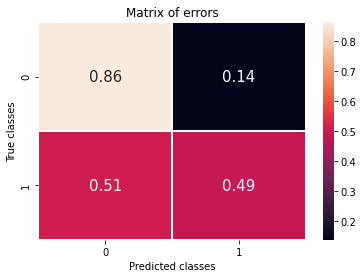

Recall 0.49282296650717705
Precision 0.4881516587677725
F1-score 0.49047619047619045
AUC-ROC 0.6781434680829185 



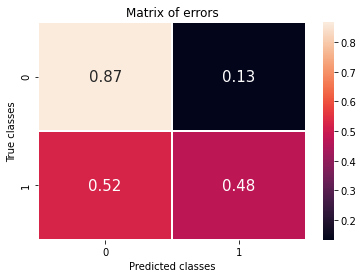

Recall 0.47607655502392343
Precision 0.48655256723716384
F1-score 0.48125755743651755
AUC-ROC 0.6716665960960325 



0it [00:00, ?it/s]

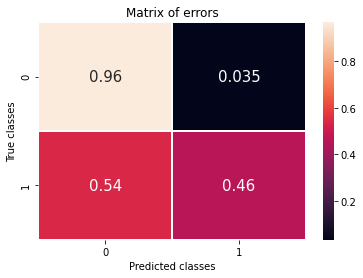

Recall 0.4569377990430622
Precision 0.7732793522267206
F1-score 0.574436090225564
AUC-ROC 0.7107697844772833 



In [12]:
# Default Model
modeltrain(DecisionTreeClassifier(random_state=12345), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With class_weigth

modeltrain(DecisionTreeClassifier(random_state=12345, class_weight='balanced'), 
               features_train, 
               target_train, 
               features_valid, 
               target_valid)

# With hyperparameter selection
max_depth = np.arange(3,15,1)
min_samples_split = np.arange(2,5)
min_samples_leaf = np.arange(1,5)
best_model = None
bestf1 = 0

dtc_params = product(max_depth, min_samples_split, min_samples_leaf)

for i in tqdm(dtc_params):

    model = DecisionTreeClassifier(random_state=12345, max_depth = i[0], min_samples_split = i[1], min_samples_leaf = i[2])
    model.fit(features_train, target_train)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_train, target_train, features_valid, target_valid)

In [13]:
display(best_model)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=12345)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Random Forest Classifier</b></center>
</div>

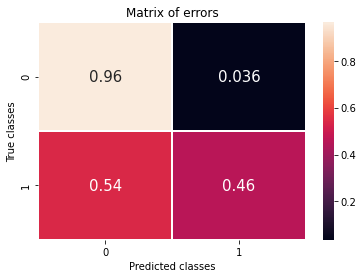

Recall 0.45933014354066987
Precision 0.7710843373493976
F1-score 0.575712143928036
AUC-ROC 0.7116499011002969 

balanced


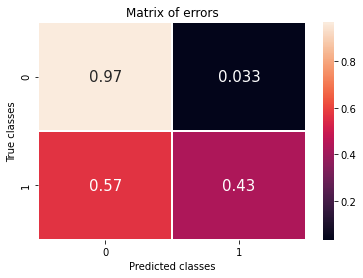

Recall 0.43301435406698563
Precision 0.776824034334764
F1-score 0.5560675883256528
AUC-ROC 0.7000722844924057 

balanced_subsample


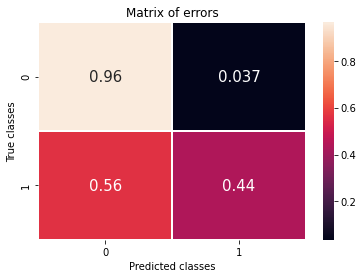

Recall 0.43779904306220097
Precision 0.7593360995850622
F1-score 0.5553869499241275
AUC-ROC 0.7005682952352724 



0it [00:00, ?it/s]

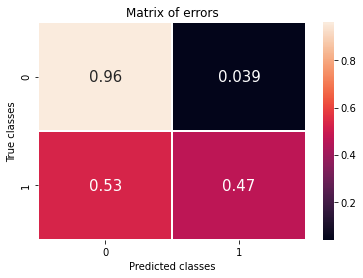

Recall 0.4688995215311005
Precision 0.7626459143968871
F1-score 0.5807407407407408
AUC-ROC 0.7151703675923518 



In [14]:
# Default Model
modeltrain(RandomForestClassifier(random_state=12345), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With class_weigth
classes_of_weight = ['balanced', 'balanced_subsample']
for class_weight in classes_of_weight:
    print(class_weight)
    modeltrain(RandomForestClassifier(random_state=12345, class_weight=class_weight), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With hyperparameter selection
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,50,10)
best_model = None
bestf1 = 0

rfc_params = product(max_depth, n_estimators)

for i in tqdm(rfc_params):

    model = RandomForestClassifier(random_state=12345, max_depth = i[0], n_estimators = i[1])
    model.fit(features_train, target_train)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_train, target_train, features_valid, target_valid)

In [15]:
best_model

RandomForestClassifier(max_depth=11, n_estimators=10, random_state=12345)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Conclusion</b></font>
    
We tried to train models on objects with class imbalance. The results could be more satisfactory.
Let's try to get rid of the class imbalance problem with several options, choose the best model for which we will adjust the hyperparameters and bring the f1-measure closer to indicators above 0.59
    

</div>

## Avoiding Disbalance

### Upsampling

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<b>Upsampling</b>
    
We balance the classes by increasing the number, and this technique is called upsampling. Now in our sample ≈80% of negative and ≈20% of positive answers. Align them by increasing the number of positive answers.
The transformation takes place in several stages:
    
- Divide the training sample into objects by classes;
- Copy several times objects with a positive answer;
- Taking into account the received data, we will create a new training sample;
- Shuffle the data.
    
</div>

In [16]:
def upsample(feature, target, repeat):
    
    # Divide the training sample into objects by classes
    feature_zeros = feature[target == 0]
    feature_ones = feature[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Let's copy objects with a positive answer several times and, taking into account the received data, create a new training set
    feature_upsampled = pd.concat([feature_zeros] + [feature_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # Let's shuffle the data
    feature_upsampled = shuffle(feature_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return feature_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

display(target_upsampled.value_counts(normalize = 1).to_frame())

(9588, 11)
(9588,)


,exited
0,0.501043
1,0.498957


<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Logistic Regression</b></center>
</div>

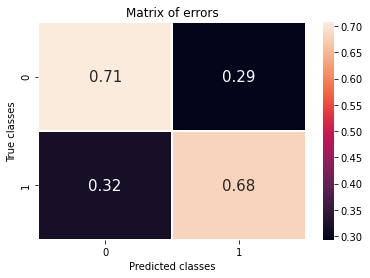

Recall 0.6818181818181818
Precision 0.3810160427807487
F1-score 0.4888507718696398
AUC-ROC 0.6945753361682564 



In [17]:
modeltrain(LogisticRegression(random_state=12345, solver='liblinear'), 
           features_upsampled, 
           target_upsampled ,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Decision Tree Classifier</b></center>
</div>

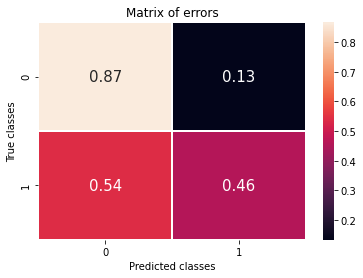

Recall 0.45933014354066987
Precision 0.47642679900744417
F1-score 0.46772228989037756
AUC-ROC 0.6629773347286155 



In [18]:
modeltrain(DecisionTreeClassifier(random_state=12345), 
           features_upsampled, 
           target_upsampled ,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Random Forest Classifier</b></center>
</div>

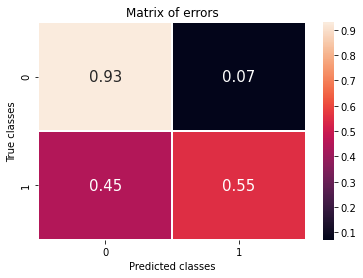

Recall 0.5526315789473685
Precision 0.6754385964912281
F1-score 0.6078947368421053
AUC-ROC 0.7412336150109787 



0it [00:00, ?it/s]

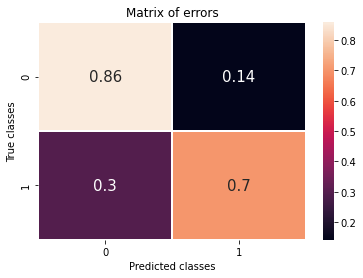

Recall 0.7033492822966507
Precision 0.5675675675675675
F1-score 0.6282051282051282
AUC-ROC 0.7808781809713342 



RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345)

In [19]:
modeltrain(RandomForestClassifier(random_state=12345), 
           features_upsampled, 
           target_upsampled ,
           features_valid, 
           target_valid)

# With selection of hyperparameters
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,50,10)
class_weight = ['balanced', 'balanced_subsample', None]
best_model = None
bestf1 = 0

rfc_params = product(max_depth, n_estimators,class_weight)

for i in tqdm(rfc_params):

    model = RandomForestClassifier(random_state=12345, max_depth = i[0], n_estimators = i[1], class_weight = i[2])
    model.fit(features_upsampled, target_upsampled)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_upsampled, target_upsampled, features_valid, target_valid)
best_model

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Intermediate conclusion<b></font>

After increasing the sample, our predictions improved. F1-measure increased. All models became much better at predicting a positive response. We wanted to achieve this when we initially set the task.
    
Best of all, the increase in the sample affected the random forest model.
    
- Completeness increased due to an increase in the number of correctly predicted positive answers by 23%;
- Decreased accuracy since the prediction of negative answers decreased by 10%. But this prediction could also include clients who are still them today but potentially with a high degree of probability, can leave the bank;
- f1-measure rose to 0.628, which is already above 0.59. But we will continue to try to improve our model;
- AUC-ROC increased from 0.715 to 0.781.

</div>



### Downsampling
    



<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<b>Downsampling</b>
    
Instead of repeating objects of a smaller class, let's remove some of the objects of a larger class. Let's reduce the number of negative answers due to the downsampling function.
    
The transformation takes place in several stages:

- Divide the training sample into objects by classes;
- Randomly discard some of the objects with a negative answer;
- Taking into account the received data, we will create a new training sample;
- Shuffle the data.
    
</div>

In [20]:
def downsample(feature, target, fraction):
    
    # Divide the training sample into objects by classes
    feature_zeros = feature[target == 0]
    feature_ones = feature[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Randomly discard some of the objects with a negative answer
    feature_sample = feature_zeros.sample(frac=fraction, random_state=12345)
    target_sample = target_zeros.sample(frac=fraction, random_state=12345)
    
    # Based on the received data, we will create a new training sample
    feature_downsampled = pd.concat([feature_sample] + [feature_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    # Let's shuffle the data
    feature_downsampled = shuffle(feature_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)
    
    return feature_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

display(target_downsampled.value_counts(normalize = 1).to_frame())

(2397, 11)
(2397,)


,exited
0,0.501043
1,0.498957


<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Logistic Regression</b></center>
</div>

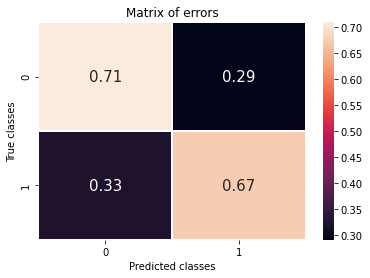

Recall 0.6746411483253588
Precision 0.3795423956931359
F1-score 0.48578811369509034
AUC-ROC 0.6916189306734253 



In [21]:
modeltrain(LogisticRegression(random_state=12345, solver='liblinear'), 
           features_downsampled, 
           target_downsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Decision Tree Classifier</b></center>
</div>

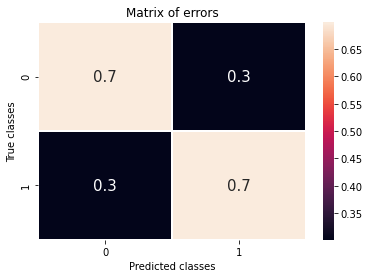

Recall 0.6985645933014354
Precision 0.3787289234760052
F1-score 0.49116904962153074
AUC-ROC 0.6978916518972411 



In [22]:
modeltrain(DecisionTreeClassifier(random_state=12345), 
           features_downsampled, 
           target_downsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Random Forest Classifier</b></center>
</div>

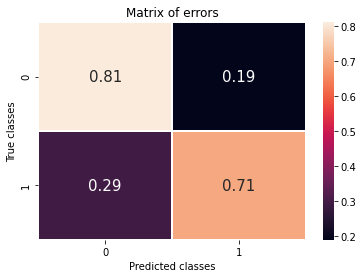

Recall 0.7057416267942583
Precision 0.49663299663299665
F1-score 0.5830039525691699
AUC-ROC 0.7583701812858776 



0it [00:00, ?it/s]

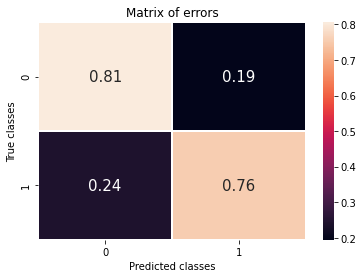

Recall 0.7559808612440191
Precision 0.507223113964687
F1-score 0.6071085494716619
AUC-ROC 0.7809613535044369 



RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=40, random_state=12345)

In [23]:
modeltrain(RandomForestClassifier(random_state=12345, n_estimators=10), 
           features_downsampled, 
           target_downsampled,
           features_valid, 
           target_valid)

# With selection of hyperparameters
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,50,10)
best_model = None
class_weight = ['balanced', 'balanced_subsample', None]
bestf1 = 0

rfc_params = product(max_depth, n_estimators,class_weight)

for i in tqdm(rfc_params):

    model = RandomForestClassifier(random_state=12345, max_depth = i[0], n_estimators = i[1], class_weight = i[2])
    model.fit(features_downsampled, target_downsampled)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_downsampled, target_downsampled, features_valid, target_valid)
display(best_model)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Intermediate conclusion<b></font>

After downsampling, our predictions improved. F1-measure increased. All models became better at predicting a positive response. We wanted to achieve this when we initially set the task.
    
Best of all, the increase in the sample affected the random forest model.
    
- Completeness has increased due to an increase in the number of correctly predicted positive answers by more than 25%. It's better than Upsampling;
- Decreased accuracy since the prediction of negative answers decreased by 16%. This is worse than Upsampling;
- f1-measure rose to 0.607, which is higher than the target of 0.59 but lower than that of Upsampling;
- AUC-ROC increased from 0.715 to 0.781. This is lower than Upsampling.
    
<hr>
    
In this Project, we are guided by the value of the f1-measure, so we choose the Upsampling.
Among all the models, Random Forest performed best on the validation sample. Therefore, we prefer a Random Forest Classifier, a representative with upsampling, and climb inside our model to improve it using hyperparameter enumeration.
</div>

### Model improvement

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


Let's make a series of nested loops in which we will iterate over all the hyperparameters of our model. Let's take the following parameters:
- max_depth - maximum tree depth;
- n_estimators - number of trees;
- min_samples_split - minimum number of objects to split an internal node;
- class_weight - weight adjustment.

At the end of the loop, we record all the hyperparameters that gave us an f1 value greater than 0.59 and also recorded the f1-measure and auc-roc values on the validation set for each successful model.
    
    
<hr>
    
To create a nested loop, we use the product function to perform the Cartesian product of all our hyperparameters without writing code from four "for" loops. An example of a Cartesian product is shown below in the picture.
    
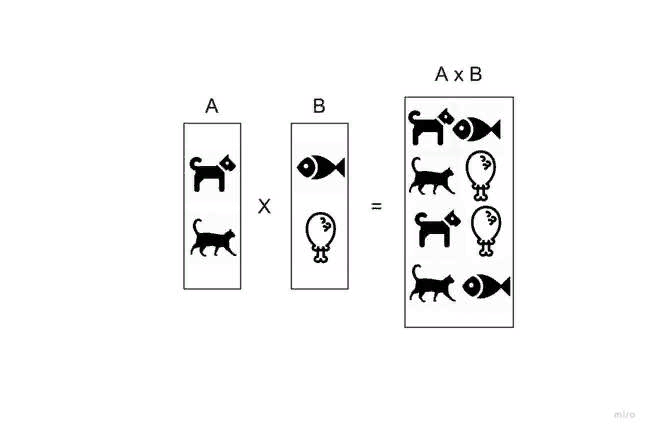
    
Of course, we found a bad picture. Dogs are not allowed to eat fish and tubular bones.
</div>

In [24]:
%%time
# The value of the f1-measure we are aiming for
best_f1 = 0.59

# Variants of hyperparameters from which we will choose the best
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,91,10)
class_weight = ['balanced', 'balanced_subsample', None]

# A generator that produces the Cartesian product for the elements of the specified objects.
rfc_params = product(max_depth, n_estimators, class_weight)

# Here we will write good hyperparameters and metrics
max_depth_table = []
n_estimators_table = []
class_weight_table = []
f1_table = []
auc_roc_table = []

# Model with enumeration of hyperparameters
for i in tqdm(rfc_params):
    # Setting hyperparameters
    model = RandomForestClassifier(random_state=12345, n_jobs=-1, max_depth = i[0], n_estimators = i[1], 
                                   class_weight = i[2])
    # Train
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid)
    # Metrics
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    # Condition
    if f1 >= best_f1:
        # Collect best hyperparametrs
        max_depth_table.append(i[0])
        n_estimators_table.append(i[1])
        class_weight_table.append(i[2])

        f1_table.append(f1)
        auc_roc_table.append(auc_roc)
        
# Collect all values in one table, rename and sort
param_table = pd.DataFrame(data = (max_depth_table, n_estimators_table,
                                   class_weight_table, f1_table, auc_roc_table)).T
param_table.columns = ('max_depth', 'n_estimators', 'class_weight', 'f1', 'auc_roc')
param_table = param_table.sort_values('f1', ascending = False).reset_index(drop=True)

display(param_table.head())

0it [00:00, ?it/s]

,max_depth,n_estimators,class_weight,f1,auc_roc
0,9.0,60.0,NaN,0.630458,0.782954
1,9.0,70.0,NaN,0.628328,0.781442
2,9.0,40.0,NaN,0.628205,0.780878
3,9.0,90.0,NaN,0.626709,0.782186
4,9,90,balanced,0.626455,0.781058


CPU times: user 44.3 s, sys: 465 ms, total: 44.8 s
Wall time: 45 s


Train our best model. We get the following result on the validation set



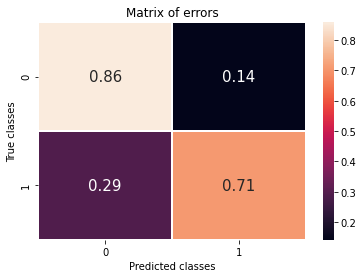

Recall 0.7081339712918661
Precision 0.5681381957773513
F1-score 0.630457933972311
AUC-ROC 0.7829544698431518 


 Check on the model that predicts the most common class 

Dummy Classifier


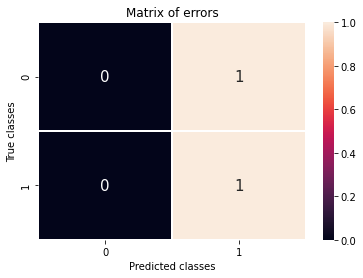

Recall 1.0
Precision 0.209
F1-score 0.3457402812241522
AUC-ROC 0.5 



In [25]:
best_model = RandomForestClassifier(random_state=12345, n_jobs = -1, 
                                    max_depth = 9,
                                    n_estimators = 60, 
                                    class_weight = None)


print('Train our best model. We get the following result on the validation set\n')
#modeltrain(best_model,features_upsampled,target_upsampled,features_valid, target_valid)


modeltrain(best_model, 
           features_upsampled, 
           target_upsampled,
           features_valid, 
           target_valid)

print('\n Check on the model that predicts the most common class \n')
print('Dummy Classifier')
modeltrain(DummyClassifier(strategy="constant",constant = 1, random_state=12345),
           features_upsampled,
           target_upsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Intermediate conclusion<b></font>

We have selected satisfying parameters for our model to give an f1-measure value above 0.59.
    
It remains to write the final function for evaluating the metrics of the model and displaying the ROC curve on the screen to ensure that the model is better than a random one.

</div>

In [26]:
def final_test(final_model, 
               features_upsampled,
               target_upsampled,
               features_test, 
               target_test):
    # Train our final model, derive metrics and confusion matrix
    modeltrain(final_model, features_upsampled, target_upsampled, features_test, target_test)
    # Let's build a ROC curve
    final_model.fit(features_upsampled, target_upsampled)
    probabilities_one_test = final_model.predict_proba(features_test)[:, 1]
    probabilities_test = final_model.predict_proba(features_test)
    precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

    plt.figure(figsize = [10,10])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='dashed')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()

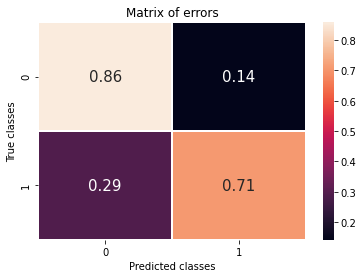

Recall 0.7081339712918661
Precision 0.5681381957773513
F1-score 0.630457933972311
AUC-ROC 0.7829544698431518 



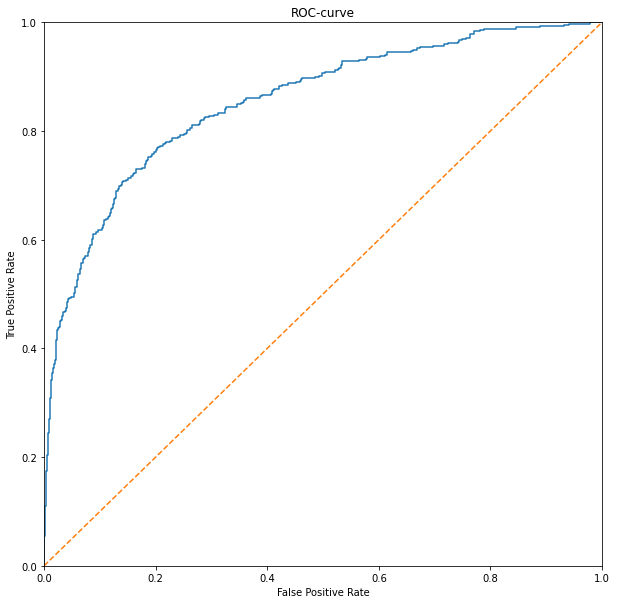

CPU times: user 1.24 s, sys: 94.9 ms, total: 1.34 s
Wall time: 1.35 s


In [27]:
%%time
final_test(best_model,
           features_upsampled,
           target_upsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### Conclusion
    
    
1. There needed to be more in the initial data. In the future, it is necessary to understand the nature of the occurrence of such gaps, fill them in and train the model again.

2. In the course of data preparation, numerical ones replaced categorical features, all numerical features were scaled, redundant data were removed, and data types were replaced
    
3. The problem of class imbalance was solved by increasing the number of samples with a positive result by four times so that the proportion of these classes for the training sample was: 1 - 0.506972, 0 - 0.493028
    
4. After fighting the imbalance, we fitted hyperparameters using the Cartesian product. The Random Forest Classifier was the most successful model at all stages of our study.
    
5. After the selection of hyperparameters, the following model was chosen:

</div>

In [28]:
best_model

RandomForestClassifier(max_depth=9, n_estimators=60, n_jobs=-1,
                       random_state=12345)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

5. Model results:
    
        
- Recall 0.708;
- Precision 0.568;
- F1-score 0.631;
- AUC-ROC 0.783.
6. The final model was tested for adequacy compared to the constant model. This has been tested in 2 ways:
    
- Compared to DummyClassifier, a model that produced a single class value, which is most often found in the training sample
- Compared to the ROC curve, which was located above the line given by the random classifier.
The proportion of false positive responses was plotted horizontally, and the ratio of true positive responses was plotted vertically. After sorting through the values of the threshold of our model and drawing a curve, we built a ROC-curve or an error curve. For a model that always responds randomly, the ROC curve looks like a straight line going from the bottom left to the top right. The higher the graph, the better the quality of the model. The area under this curve is exactly equal to our AUC-ROC metric.
    
7. Our model has yet to be retrained and is ready for a test set.


</div>

![](https://i.gifer.com/5fh.gif) 

## Test Model

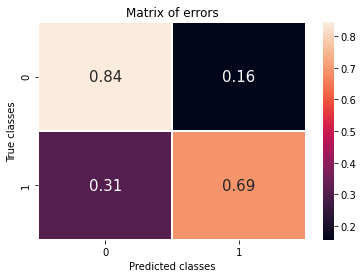

Recall 0.6926713947990544
Precision 0.5425925925925926
F1-score 0.608515057113188
AUC-ROC 0.768022444387479 



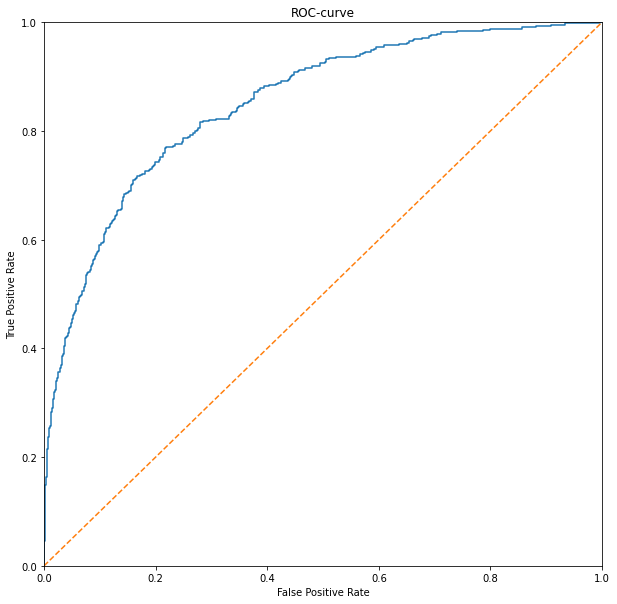

CPU times: user 1.2 s, sys: 82 ms, total: 1.28 s
Wall time: 1.29 s


In [29]:
%%time
final_test(best_model,
           features_upsampled,
           target_upsampled,
           features_test, 
           target_test)   

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Total<b></font>

Our model on the test sample produces an excellent result:
    
      
- Recall 0.693;
- Precision 0.543;
- F1-score 0.609;
- AUC-ROC 0.768.
    
The final test gave the f1 metric above the required value of 0.59 and amounted to 0.609. The area under the ROC curve is high at 0.768.
    
Our model will help maintain the loyalty of 69 customers out of a potential hundred who want to close their accounts. Our model predicts more than half of customer churn, which means that the marketing costs of retaining such customers will be well-spent. You can safely run the model to work. But it is also worth thinking about improving the model by collecting additional information.
<hr>
To improve the model, you can take additional static or dynamic data. E.g.,
    
- Does the client have deposits (static);
- Does the client have a salary card (static);
- Whether funds are deducted from the account for subscribing to third-party services (static) and what kind of services they are;
- What cashback he receives monthly (dynamic);
- As often happens on business trips (dynamic).
 
    
Based on this data, offering different marketing approaches to each client is possible. Select suitable cashback categories for a month, provide new banking products, and advertise your products in services with subscriptions for customers who close their bank accounts.
Customers leaving depends on more than just the fact that he is not satisfied with the products offered. The marketing campaign of other companies also influences his departure.   

</div>
    
![](https://i.gifer.com/GDRf.gif)

In [ ]:
<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1">Data preparation</a></span><ul class="toc-item"><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-1.1"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-1.2"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3"><font color="green"><b>Conclusion</b></font></a></span></li></ul></li><li><span><a href="#Problem-research" data-toc-modified-id="Problem-research-2">Problem research</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><font color="green"><b>Conclusion</b></font></a></span></li></ul></li><li><span><a href="#Avoiding-Disbalance" data-toc-modified-id="Avoiding-Disbalance-3">Avoiding Disbalance</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1">Upsampling</a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-3.2"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3">Downsampling</a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-3.4"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Model-improvement" data-toc-modified-id="Model-improvement-3.5">Model improvement</a></span></li><li><span><a href="#Intermediate-conclusion" data-toc-modified-id="Intermediate-conclusion-3.6"><font color="green"><b>Intermediate conclusion<b></b></b></font></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.7">Conclusion</a></span></li></ul></li><li><span><a href="#Test-Model" data-toc-modified-id="Test-Model-4">Test Model</a></span><ul class="toc-item"><li><span><a href="#Total" data-toc-modified-id="Total-4.1"><font color="green"><b>Total<b></b></b></font></a></span></li></ul></li></ul></div>

# Customer churn

Customers began to leave X-Bank. Every month. A little, but noticeable. Banking marketers figured keeping current customers was cheaper than attracting new ones.

It is necessary to predict whether the client will leave the bank soon or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. Check the *F1*-measure on the test set yourself. To pass the project successfully, you must bring the metric to 0.59.

Additionally, measure *AUC-ROC*and compare its value with *F1*-measure.

Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data preparation

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("magma")
from itertools import product
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

# Let's examine the file
data = pd.read_csv('/datasets/Churn.csv')
display(data.sample(5), data.info(), data.describe())
data.hist(bins=50, figsize=(20,15), linewidth=1)
plt.show()
data.tail()

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Intermediate conclusion<b></font>


Before us is an array of data on 10,000 clients of Beta-Bank, which contains the following information:
    
<blockquote>
    
- RowNumber - row index in the data;
- CustomerId — unique customer identifier;
- Surname - surname;
- CreditScore — credit rating;
- Geography — country of residence;
- Gender - gender;
- Age — age;
- Tenure - how many years a person has been a client of the bank;
- Balance — account balance;
- NumOfProducts - the number of bank products used by the client;
- HasCrCard - the presence of a credit card;
- IsActiveMember — client activity;
- EstimatedSalary — estimated salary;
- Exited - the fact that the client left.
</blockquote>
<hr>
    
Necessary:
<blockquote>
    
- Check data for repetitions;
- Deal with gaps in the Tenure column. It contains 10% of missing information, which the model will learn better. Considering that we do not know the reason for the skip, we will replace it with a value that will not be repeated;
- Remove columns from the table that will not affect the training of the model in any way;
- Convert categorical features from numerical ones;
- Rename columns for ease of use;
- Convert the data to the required types.
</blockquote> 
</div>

# Fill in the gaps in the Tenure column by grouping customers by features.

data['Tenure'] = data.groupby([data['NumOfProducts'],
                              data['Geography'],
                              data['Age'],
                              data['HasCrCard']])['Tenure'].apply(lambda x: x.fillna(round(x.median(),0)))

# A few gaps are left; let's fill them in by changing the grouping by age to the client's activity.
data['Tenure'] = data.groupby([data['NumOfProducts'],
                              data['Geography'],
                              data['HasCrCard'],
                              data['IsActiveMember']])['Tenure'].apply(lambda x: x.fillna(round(x.median(),0)))

data['Tenure'].value_counts().sum()

# Check users for repetitions
display(data.CustomerId.value_counts().sum())

'''
The number of unique ids is 10.000, as is the number of rows.
So there are no complete duplicates either.
It is necessary to remove columns that do not carry any useful information:
Line number, client id, and last name

'''
data1 = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Let's translate categorical features into numerical ones
# Prepare the data using the OHE method, avoiding the dummy trap
display(data1.Geography.value_counts().to_frame(),
        data1.Gender.value_counts().to_frame()
       )

data1 = pd.get_dummies(data1, drop_first=True)

# Rename the columns for ease of use
data1.columns = ['credit_score',
                 'age',
                 'tenure',
                 'balance',
                 'num_of_products',
                 'has_cr_card',
                 'is_active_member',
                 'estimated_salary',
                 'exited',
                 'is_germany',
                 'is_spain',
                 'is_male']

data1 = data1.astype({'tenure': 'Int32'})

display(data1.info(),
        data1.head())

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Intermediate conclusion<b></font>


After the first data preparation stage, we dealt with gaps, converted all columns to numerical form, removed unnecessary columns, and checked all data types. Now we have an array of data on 10,000 clients of Beta-Bank, which contains the following information:
    
<blockquote>
    
- credit_score — credit rating;
- age - age;
- tenure — how many years a person has been a client of the bank;
- balance — account balance;
- num_of_products - the number of bank products used by the client;
- has_cr_card - the presence of a credit card;
- is_active_member — client activity;
- estimated_salary — estimated salary;
- exited — the fact that the client left;
- is_germany — country of residence Germany;
- is_spain - country of residence Spain;
- is_male - male gender.
</blockquote>
<hr>
    
Next, we need the following:
<blockquote>
    
- Scale numerical values so the algorithm does not decide that features with large values and scatter are more critical. After scaling, the mean value of the feature will be 0, and the variance will be 1;
- Divide the samples into features and the target feature, and then divide them into training, validation, and testing in the proportion of 60/20/20. The target feature in our table is the 'exited' column; according to the rest of the features, our model will predict the values of the target feature in the validation and test sets at the end of training.
</blockquote> 
</div>

# Let's scale numerical values
numeric = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure', 'num_of_products']
scaler = StandardScaler()
scaler.fit(data1[numeric])
def scaling(data):
    data[numeric] = scaler.transform(data[numeric])
    display(data.head(2))
            

scaling(data1)
    

data1.hist(bins=50, figsize=(20,15), linewidth=1)
plt.show()

# Divide the model into samples with the following proportion 6/2/2

features = data1.drop('exited', axis=1)
target = data1['exited']

features_train, features_valid_test, target_train, target_valid_test = ( 
                                train_test_split(
                                features, target, test_size=0.40, random_state=12345)
)
features_valid, features_test, target_valid, target_test = ( 
                                train_test_split(
                                features_valid_test, target_valid_test, test_size=0.50, random_state=12345)
)
print(' Training data scale:', features_train.shape,
'\n Validation data scale:', features_valid.shape,
'\n Test data scale:', features_test.shape)
display(target_train.value_counts(normalize = 1).to_frame(),
      target_valid.value_counts(normalize = 1).to_frame(),
      target_test.value_counts(normalize = 1).to_frame())

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Conclusion</b></font>

<center><b>We are faced with the task of classification</b></center>
    
Before studying the problem, we transformed the data:
    
<blockquote>
    
- Checked the data for repetitions;
- Dealt with passes;
- Removed unnecessary features (name, id, line number);
- Converted categorical features into numerical ones;
- Brought the data to the required types;
- Made scaling of numerical values;
- Separated the target feature from the features;
- Divided the data into samples (training, validation, and test).

</blockquote>
<hr>
    
<b>Next you need:</b>
    
Explore the problem
    
Based on a preliminary analysis of the initial data on the histogram of the 'exited' column, it can be seen that there is an imbalance of classes. The data contains four times more data on customers who have yet to leave the bank. Considering that the main task for our model is to successfully predict and predict the moment the client wants to go, such an imbalance can interfere with the quality training of the model. Also, some customers who have not left the bank may want to leave.
    
</div>

## Problem research

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

<b>Let's start building our first-class imbalance models. </b>
    
Let's write a function that will train the model. We will submit the model, training, and validation samples as input. We will train the model inside the function and make a prediction based on the validation set. Let's output:
    
- An error matrix, which will display the accuracy of our predictions;
    ![image-2.png](attachment:image-2.png)
    
- Completeness (recall) - what proportion of positive responses among all the answers was allocated by the model;
- Accuracy (precision) - how many negative answers the model found while looking for positive ones;
- F1-measure - harmonic mean of completeness and accuracy;
- AUC-ROC - area under ROC curve or error curve. If the value is more significant than 0.5, then the model is better than the random model.
</div>

# Let's write the function of training the model, predicting and displaying metrics on the screen

def modeltrain(model_type, feature_train, targets_train, features_valid, target_valid):
    
    model = model_type
    
    # Train model
    model.fit(feature_train, targets_train)
    
    
    prediction = model.predict(features_valid)

    # Let's build the matrix of inaccuracies
    matrix = confusion_matrix(target_valid, prediction)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    # Displaying the matrix
    sns.heatmap(matrix, annot=True, annot_kws={'size':15}, linewidths=0.3)
    plt.xlabel('Predicted classes')
    plt.ylabel('True classes')
    plt.title('Matrix of errors')
    plt.show()
    
    
    # Display classification metrics
    print("Recall" , recall_score(target_valid, prediction))
    print("Precision", precision_score(target_valid, prediction))
    print("F1-score", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, prediction), '\n')

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

<center><b>Class balance</b></center>    

</div>

# Class balance
data1['exited'].value_counts(normalize = 1).to_frame()

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Logistic regression</b></center>
</div>

%%time
from sklearn.model_selection import GridSearchCV

# Default Model
modeltrain(LogisticRegression(random_state=12345, solver='liblinear'), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With class_weight
modeltrain(LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced'), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With hyperparameter selection
parametres = {'intercept_scaling': [0.5, 1.0, 1.5],
              'class_weight': [None, 'balanced'],
              'C': [0.5, 1, 1.5]}
model = LogisticRegression(random_state=12345, solver = 'liblinear')

grid_search = GridSearchCV(model, parametres, cv=5, scoring='f1')
grid_search.fit(features_train, target_train)
print(grid_search.best_params_)

modeltrain(LogisticRegression(**grid_search.best_params_), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Decision Tree</b></center>
</div>

# Default Model
modeltrain(DecisionTreeClassifier(random_state=12345), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With class_weigth

modeltrain(DecisionTreeClassifier(random_state=12345, class_weight='balanced'), 
               features_train, 
               target_train, 
               features_valid, 
               target_valid)

# With hyperparameter selection
max_depth = np.arange(3,15,1)
min_samples_split = np.arange(2,5)
min_samples_leaf = np.arange(1,5)
best_model = None
bestf1 = 0

dtc_params = product(max_depth, min_samples_split, min_samples_leaf)

for i in tqdm(dtc_params):

    model = DecisionTreeClassifier(random_state=12345, max_depth = i[0], min_samples_split = i[1], min_samples_leaf = i[2])
    model.fit(features_train, target_train)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_train, target_train, features_valid, target_valid)

display(best_model)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Random Forest Classifier</b></center>
</div>

# Default Model
modeltrain(RandomForestClassifier(random_state=12345), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With class_weigth
classes_of_weight = ['balanced', 'balanced_subsample']
for class_weight in classes_of_weight:
    print(class_weight)
    modeltrain(RandomForestClassifier(random_state=12345, class_weight=class_weight), 
           features_train, 
           target_train, 
           features_valid, 
           target_valid)

# With hyperparameter selection
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,50,10)
best_model = None
bestf1 = 0

rfc_params = product(max_depth, n_estimators)

for i in tqdm(rfc_params):

    model = RandomForestClassifier(random_state=12345, max_depth = i[0], n_estimators = i[1])
    model.fit(features_train, target_train)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_train, target_train, features_valid, target_valid)

best_model

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Conclusion</b></font>
    
We tried to train models on objects with class imbalance. The results could be more satisfactory.
Let's try to get rid of the class imbalance problem with several options, choose the best model for which we will adjust the hyperparameters and bring the f1-measure closer to indicators above 0.59
    

</div>

## Avoiding Disbalance

### Upsampling

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<b>Upsampling</b>
    
We balance the classes by increasing the number, and this technique is called upsampling. Now in our sample ≈80% of negative and ≈20% of positive answers. Align them by increasing the number of positive answers.
The transformation takes place in several stages:
    
- Divide the training sample into objects by classes;
- Copy several times objects with a positive answer;
- Taking into account the received data, we will create a new training sample;
- Shuffle the data.
    
</div>

def upsample(feature, target, repeat):
    
    # Divide the training sample into objects by classes
    feature_zeros = feature[target == 0]
    feature_ones = feature[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Let's copy objects with a positive answer several times and, taking into account the received data, create a new training set
    feature_upsampled = pd.concat([feature_zeros] + [feature_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # Let's shuffle the data
    feature_upsampled = shuffle(feature_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return feature_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

display(target_upsampled.value_counts(normalize = 1).to_frame())

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Logistic Regression</b></center>
</div>

modeltrain(LogisticRegression(random_state=12345, solver='liblinear'), 
           features_upsampled, 
           target_upsampled ,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Decision Tree Classifier</b></center>
</div>

modeltrain(DecisionTreeClassifier(random_state=12345), 
           features_upsampled, 
           target_upsampled ,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Random Forest Classifier</b></center>
</div>

modeltrain(RandomForestClassifier(random_state=12345), 
           features_upsampled, 
           target_upsampled ,
           features_valid, 
           target_valid)

# With selection of hyperparameters
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,50,10)
class_weight = ['balanced', 'balanced_subsample', None]
best_model = None
bestf1 = 0

rfc_params = product(max_depth, n_estimators,class_weight)

for i in tqdm(rfc_params):

    model = RandomForestClassifier(random_state=12345, max_depth = i[0], n_estimators = i[1], class_weight = i[2])
    model.fit(features_upsampled, target_upsampled)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_upsampled, target_upsampled, features_valid, target_valid)
best_model

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### <font color='green'><b>Intermediate conclusion<b></font>

After increasing the sample, our predictions improved. F1-measure increased. All models became much better at predicting a positive response. We wanted to achieve this when we initially set the task.
    
Best of all, the increase in the sample affected the random forest model.
    
- Completeness increased due to an increase in the number of correctly predicted positive answers by 23%;
- Decreased accuracy since the prediction of negative answers decreased by 10%. But this prediction could also include clients who are still them today but potentially with a high degree of probability, can leave the bank;
- f1-measure rose to 0.628, which is already above 0.59. But we will continue to try to improve our model;
- AUC-ROC increased from 0.715 to 0.781.

</div>



### Downsampling
    



<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<b>Downsampling</b>
    
Instead of repeating objects of a smaller class, let's remove some of the objects of a larger class. Let's reduce the number of negative answers due to the downsampling function.
    
The transformation takes place in several stages:

- Divide the training sample into objects by classes;
- Randomly discard some of the objects with a negative answer;
- Taking into account the received data, we will create a new training sample;
- Shuffle the data.
    
</div>

def downsample(feature, target, fraction):
    
    # Divide the training sample into objects by classes
    feature_zeros = feature[target == 0]
    feature_ones = feature[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Randomly discard some of the objects with a negative answer
    feature_sample = feature_zeros.sample(frac=fraction, random_state=12345)
    target_sample = target_zeros.sample(frac=fraction, random_state=12345)
    
    # Based on the received data, we will create a new training sample
    feature_downsampled = pd.concat([feature_sample] + [feature_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    # Let's shuffle the data
    feature_downsampled = shuffle(feature_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)
    
    return feature_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

display(target_downsampled.value_counts(normalize = 1).to_frame())

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Logistic Regression</b></center>
</div>

modeltrain(LogisticRegression(random_state=12345, solver='liblinear'), 
           features_downsampled, 
           target_downsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Decision Tree Classifier</b></center>
</div>

modeltrain(DecisionTreeClassifier(random_state=12345), 
           features_downsampled, 
           target_downsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">
<center><b>Random Forest Classifier</b></center>
</div>

modeltrain(RandomForestClassifier(random_state=12345, n_estimators=10), 
           features_downsampled, 
           target_downsampled,
           features_valid, 
           target_valid)

# With selection of hyperparameters
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,50,10)
best_model = None
class_weight = ['balanced', 'balanced_subsample', None]
bestf1 = 0

rfc_params = product(max_depth, n_estimators,class_weight)

for i in tqdm(rfc_params):

    model = RandomForestClassifier(random_state=12345, max_depth = i[0], n_estimators = i[1], class_weight = i[2])
    model.fit(features_downsampled, target_downsampled)

    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)

    if f1>bestf1:
        bestf1=f1
        best_model = model

modeltrain(best_model, features_downsampled, target_downsampled, features_valid, target_valid)
display(best_model)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Intermediate conclusion<b></font>

After downsampling, our predictions improved. F1-measure increased. All models became better at predicting a positive response. We wanted to achieve this when we initially set the task.
    
Best of all, the increase in the sample affected the random forest model.
    
- Completeness has increased due to an increase in the number of correctly predicted positive answers by more than 25%. It's better than Upsampling;
- Decreased accuracy since the prediction of negative answers decreased by 16%. This is worse than Upsampling;
- f1-measure rose to 0.607, which is higher than the target of 0.59 but lower than that of Upsampling;
- AUC-ROC increased from 0.715 to 0.781. This is lower than Upsampling.
    
<hr>
    
In this Project, we are guided by the value of the f1-measure, so we choose the Upsampling.
Among all the models, Random Forest performed best on the validation sample. Therefore, we prefer a Random Forest Classifier, a representative with upsampling, and climb inside our model to improve it using hyperparameter enumeration.
</div>

### Model improvement

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


Let's make a series of nested loops in which we will iterate over all the hyperparameters of our model. Let's take the following parameters:
- max_depth - maximum tree depth;
- n_estimators - number of trees;
- min_samples_split - minimum number of objects to split an internal node;
- class_weight - weight adjustment.

At the end of the loop, we record all the hyperparameters that gave us an f1 value greater than 0.59 and also recorded the f1-measure and auc-roc values on the validation set for each successful model.
    
    
<hr>
    
To create a nested loop, we use the product function to perform the Cartesian product of all our hyperparameters without writing code from four "for" loops. An example of a Cartesian product is shown below in the picture.
    
![image.png](attachment:image.png)
    
Of course, we found a bad picture. Dogs are not allowed to eat fish and tubular bones.
</div>

%%time
# The value of the f1-measure we are aiming for
best_f1 = 0.59

# Variants of hyperparameters from which we will choose the best
max_depth = np.arange(3,12,2)
n_estimators = np.arange(10,91,10)
class_weight = ['balanced', 'balanced_subsample', None]

# A generator that produces the Cartesian product for the elements of the specified objects.
rfc_params = product(max_depth, n_estimators, class_weight)

# Here we will write good hyperparameters and metrics
max_depth_table = []
n_estimators_table = []
class_weight_table = []
f1_table = []
auc_roc_table = []

# Model with enumeration of hyperparameters
for i in tqdm(rfc_params):
    # Setting hyperparameters
    model = RandomForestClassifier(random_state=12345, n_jobs=-1, max_depth = i[0], n_estimators = i[1], 
                                   class_weight = i[2])
    # Train
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid)
    # Metrics
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    # Condition
    if f1 >= best_f1:
        # Collect best hyperparametrs
        max_depth_table.append(i[0])
        n_estimators_table.append(i[1])
        class_weight_table.append(i[2])

        f1_table.append(f1)
        auc_roc_table.append(auc_roc)
        
# Collect all values in one table, rename and sort
param_table = pd.DataFrame(data = (max_depth_table, n_estimators_table,
                                   class_weight_table, f1_table, auc_roc_table)).T
param_table.columns = ('max_depth', 'n_estimators', 'class_weight', 'f1', 'auc_roc')
param_table = param_table.sort_values('f1', ascending = False).reset_index(drop=True)

display(param_table.head())

best_model = RandomForestClassifier(random_state=12345, n_jobs = -1, 
                                    max_depth = 9,
                                    n_estimators = 60, 
                                    class_weight = None)


print('Train our best model. We get the following result on the validation set\n')
#modeltrain(best_model,features_upsampled,target_upsampled,features_valid, target_valid)


modeltrain(best_model, 
           features_upsampled, 
           target_upsampled,
           features_valid, 
           target_valid)

print('\n Check on the model that predicts the most common class \n')
print('Dummy Classifier')
modeltrain(DummyClassifier(strategy="constant",constant = 1, random_state=12345),
           features_upsampled,
           target_upsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Intermediate conclusion<b></font>

We have selected satisfying parameters for our model to give an f1-measure value above 0.59.
    
It remains to write the final function for evaluating the metrics of the model and displaying the ROC curve on the screen to ensure that the model is better than a random one.

</div>

def final_test(final_model, 
               features_upsampled,
               target_upsampled,
               features_test, 
               target_test):
    # Train our final model, derive metrics and confusion matrix
    modeltrain(final_model, features_upsampled, target_upsampled, features_test, target_test)
    # Let's build a ROC curve
    final_model.fit(features_upsampled, target_upsampled)
    probabilities_one_test = final_model.predict_proba(features_test)[:, 1]
    probabilities_test = final_model.predict_proba(features_test)
    precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

    plt.figure(figsize = [10,10])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='dashed')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()

%%time
final_test(best_model,
           features_upsampled,
           target_upsampled,
           features_valid, 
           target_valid)

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

### Conclusion
    
    
1. There needed to be more in the initial data. In the future, it is necessary to understand the nature of the occurrence of such gaps, fill them in and train the model again.

2. In the course of data preparation, numerical ones replaced categorical features, all numerical features were scaled, redundant data were removed, and data types were replaced
    
3. The problem of class imbalance was solved by increasing the number of samples with a positive result by four times so that the proportion of these classes for the training sample was: 1 - 0.506972, 0 - 0.493028
    
4. After fighting the imbalance, we fitted hyperparameters using the Cartesian product. The Random Forest Classifier was the most successful model at all stages of our study.
    
5. After the selection of hyperparameters, the following model was chosen:

</div>

best_model

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">

5. Model results:
    
        
- Recall 0.708;
- Precision 0.568;
- F1-score 0.631;
- AUC-ROC 0.783.
6. The final model was tested for adequacy compared to the constant model. This has been tested in 2 ways:
    
- Compared to DummyClassifier, a model that produced a single class value, which is most often found in the training sample
- Compared to the ROC curve, which was located above the line given by the random classifier.
The proportion of false positive responses was plotted horizontally, and the ratio of true positive responses was plotted vertically. After sorting through the values of the threshold of our model and drawing a curve, we built a ROC-curve or an error curve. For a model that always responds randomly, the ROC curve looks like a straight line going from the bottom left to the top right. The higher the graph, the better the quality of the model. The area under this curve is exactly equal to our AUC-ROC metric.
    
7. Our model has yet to be retrained and is ready for a test set.


</div>

![](https://i.gifer.com/5fh.gif) 

## Test Model

%%time
final_test(best_model,
           features_upsampled,
           target_upsampled,
           features_test, 
           target_test)   

<div style="border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px">


### <font color='green'><b>Total<b></font>

Our model on the test sample produces an excellent result:
    
      
- Recall 0.693;
- Precision 0.543;
- F1-score 0.609;
- AUC-ROC 0.768.
    
The final test gave the f1 metric above the required value of 0.59 and amounted to 0.609. The area under the ROC curve is high at 0.768.
    
Our model will help maintain the loyalty of 69 customers out of a potential hundred who want to close their accounts. Our model predicts more than half of customer churn, which means that the marketing costs of retaining such customers will be well-spent. You can safely run the model to work. But it is also worth thinking about improving the model by collecting additional information.
<hr>
To improve the model, you can take additional static or dynamic data. E.g.,
    
- Does the client have deposits (static);
- Does the client have a salary card (static);
- Whether funds are deducted from the account for subscribing to third-party services (static) and what kind of services they are;
- What cashback he receives monthly (dynamic);
- As often happens on business trips (dynamic).
 
    
Based on this data, offering different marketing approaches to each client is possible. Select suitable cashback categories for a month, provide new banking products, and advertise your products in services with subscriptions for customers who close their bank accounts.
Customers leaving depends on more than just the fact that he is not satisfied with the products offered. The marketing campaign of other companies also influences his departure.   

</div>
    
![](https://i.gifer.com/GDRf.gif)